In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import cgs as cgs
from scipy import interpolate
import dwarf_model as dw_model
from initial_conditions import ic_list as icl ;
from matplotlib import rc

rc('text',usetex=True)
rc('font',size=17)

using cgs py
Loading IC for  Leo_T_burkert
Loading IC for  Leo_T
MUST SET A 'potential_type'
Loading IC for  Sextans_test
MUST SET A 'potential_type'
Loading IC for  Leo_T_obs
Assuming primordial neutral for dwarf mu = 1.31
Assuming primordial ionized for halo mu = 0.6
If M200 or n_o are not set, they will be solved for
using the profile choice
Loading IC for  CarinaMidMed
If M200 or n_o are not set, they will be solved for
using the profile choice
Loading IC for  Leo_T_solve_burkert
Assuming primordial neutral for dwarf mu = 1.31
Assuming primordial ionized for halo mu = 0.6
If M200 or n_o are not set, they will be solved for
using the profile choice
Loading IC for  Leo_test
MUST SET A 'potential_type'
Loaded IC's for  7  dwarf galaxies


In [2]:
carina = icl.ic_object_dict['CarinaMidMed']

carina_orbit = np.genfromtxt("./../orbits/carina_orbit_tab.dat")
t_orbit = carina_orbit[:,0] * cgs.Myr
v_orbit = carina_orbit[:,2] * 1.0E5
rho_halo = carina.ic['n_halo'] * cgs.mp * carina.ic['mu_halo']


In [9]:
anal_carina = dw_model.analytical_dwarf('CarinaMidMed',carina.ic)
anal_carina.setup_orbit(t_orbit,rho_halo,v_orbit)
t = np.linspace(0.0,np.max(t_orbit)/cgs.Myr,2000.0)*cgs.Myr

sound_kwargs = {'RPS':{'alpha':0.250,'beta':0.1000,'method':'sound',
                'T_galaxy':1.0E4,'mu_galaxy':carina.ic['mu_dwarf']},
                'KH' :{'beta':1.1455}}
shock_kwargs = {'RPS':{'alpha':0.500,'beta':0.1111,'method':'shock'},'KH':{'beta':0.9974}}

M_tot,R_tot = anal_carina.evolve(t, ['RPS','KH'],physics_kwargs=shock_kwargs)
#M_tot2,R_tot2 = anal_carina.evolve(t, ['RPS','KH'],physics_kwargs={'RPS':sound_kwargs})

M_RPS_shock,R_RPS_shock = anal_carina.evolve(t, ['RPS'],physics_kwargs=shock_kwargs)
#M_RPS_sound,R_RPS_sound = anal_carina.evolve(t, ['RPS'],physics_kwargs={'RPS':sound_kwargs})

M_KH ,R_KH  = anal_carina.evolve(t, ['KH'], physics_kwargs=shock_kwargs)

In [10]:
fpath="/home/emerick/Research/dwarfs/flash_runs/"
carina_data = np.genfromtxt('./../plot/CarMedMidMass.dat',names=True)
adiabatic = np.genfromtxt(fpath + "carina_adiabatic/carina_adiabatic_mass_dt5Myr.dat",names=True)
nosne = np.genfromtxt(fpath + "carina_final/lowres_nosne/carina_nosne_bound_mass_0-750Myr_dt10.dat",names=True)
sne = np.genfromtxt(fpath + "carina_final/lowres/carina_nosne_mass_dt5Myr.dat",names=True)

sne31 = np.genfromtxt(fpath + "carina_final/sne_31pc/carina_sne_31pc_0-506_dt4.dat", names=True)

sne31_mass = sne31['m']
sne31_time = sne31['t']

labels = ['Gatto et. al. 2013 (2D)','Adiabatic', 'Heat/Cool','H/C + SNe']
mass_array = [carina_data['m']*1.0E4, adiabatic['m'], nosne['m'],sne['m']]
time_array = [carina_data['t']*10.0, adiabatic['t'], nosne['t'],sne['t']]
colors = ['red','blue','blue','blue']
ls= ['-','--','-.','-']

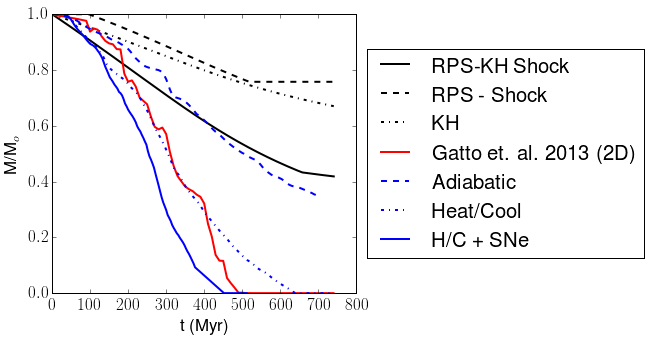

In [11]:
fig = plt.figure(figsize=[12,5])
ax1 = fig.add_subplot(1,2,1)

ax1.plot(t /cgs.Myr,M_tot/M_tot[0],label='RPS-KH Shock', lw=2, ls='-', color='black')
ax1.plot(t /cgs.Myr,M_RPS_shock/M_RPS_shock[0],label='RPS - Shock', lw=2,ls='--',color='black')
ax1.plot(t /cgs.Myr,M_KH /M_KH[0] ,label='KH',  lw=2,ls='-.',color='black')
#ax1.plot(t /cgs.Myr,M_tot2 /M_tot2[0] ,label='RPS-KH Sound',  lw=2,ls='-',color='green')
#ax1.plot(t /cgs.Myr,M_RPS_sound/M_RPS_sound[0],label='RPS - Sound', lw=2,ls='--',color='green')


for i in np.arange(np.size(labels)):
    ax1.plot(time_array[i], mass_array[i]/mass_array[i][0], label=labels[i], ls=ls[i],color=colors[i],lw=2)

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_xlabel(r't (Myr)')
ax1.set_ylabel(r'M/M$_{o}$')
ax1.set_ylim(0,1)
fig.savefig('carina_mass_evolution.png')

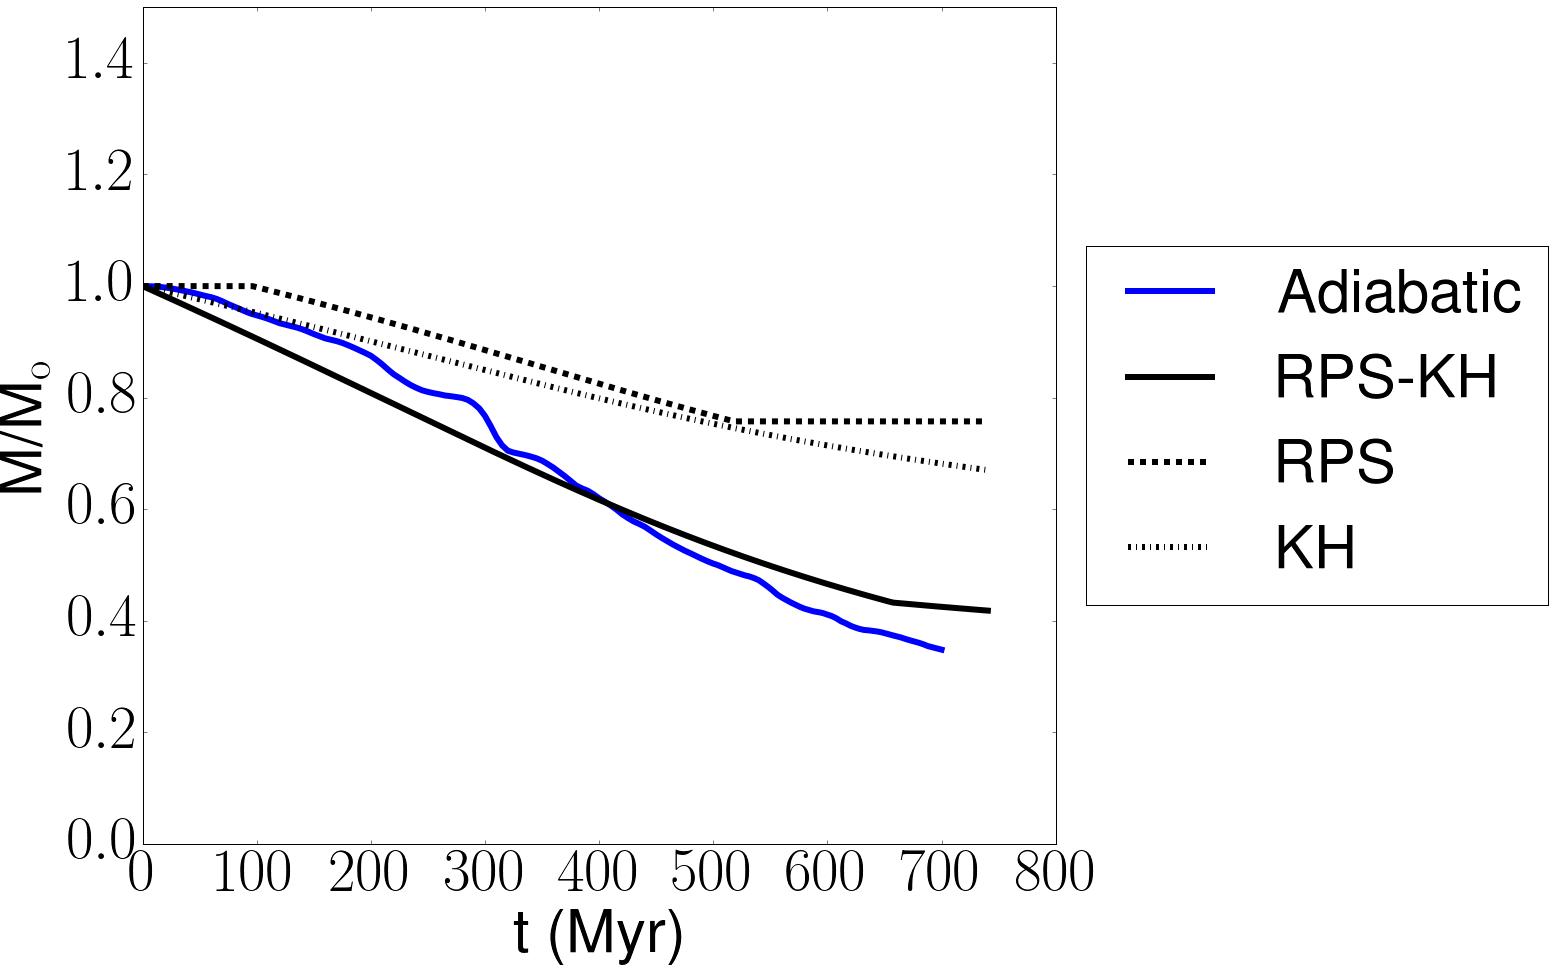

In [12]:
fig = plt.figure(figsize=[36,15])
ax1 = fig.add_subplot(1,2,1)

fs = 60; lw = 6
j = 1 # currently, the adiabatic simulation data 

ax1.plot(time_array[j], mass_array[j]/mass_array[j][0], label=labels[j], ls="-",color=colors[j],lw=lw)

ax1.plot(t /cgs.Myr,M_tot/M_tot[0],label='RPS-KH', lw=lw, ls='-', color='black')
ax1.plot(t /cgs.Myr,M_RPS_shock/M_RPS_shock[0],label='RPS', lw=lw,ls='--',color='black')
ax1.plot(t /cgs.Myr,M_KH /M_KH[0] ,label='KH',  lw=lw,ls='-.',color='black')
#ax1.plot(t /cgs.Myr,M_tot2 /M_tot2[0] ,label='RPS-KH Sound',  lw=lw,ls='-',color='green')
#ax1.plot(t /cgs.Myr,M_RPS_sound/M_RPS_sound[0],label='RPS - Sound', lw=lw,ls='--',color='green')


#for i in np.arange(np.size(labels)):

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=fs)
ax1.set_xlabel(r't (Myr)',fontsize=fs)
ax1.set_ylabel(r'M/M$_{\rm{o}}$',fontsize=fs)
ax1.set_ylim(0,1.5)
ax1.tick_params(axis='x', labelsize=fs)
ax1.tick_params(axis='y', labelsize=fs)
fig.savefig('carina_adiabatic_model.png')

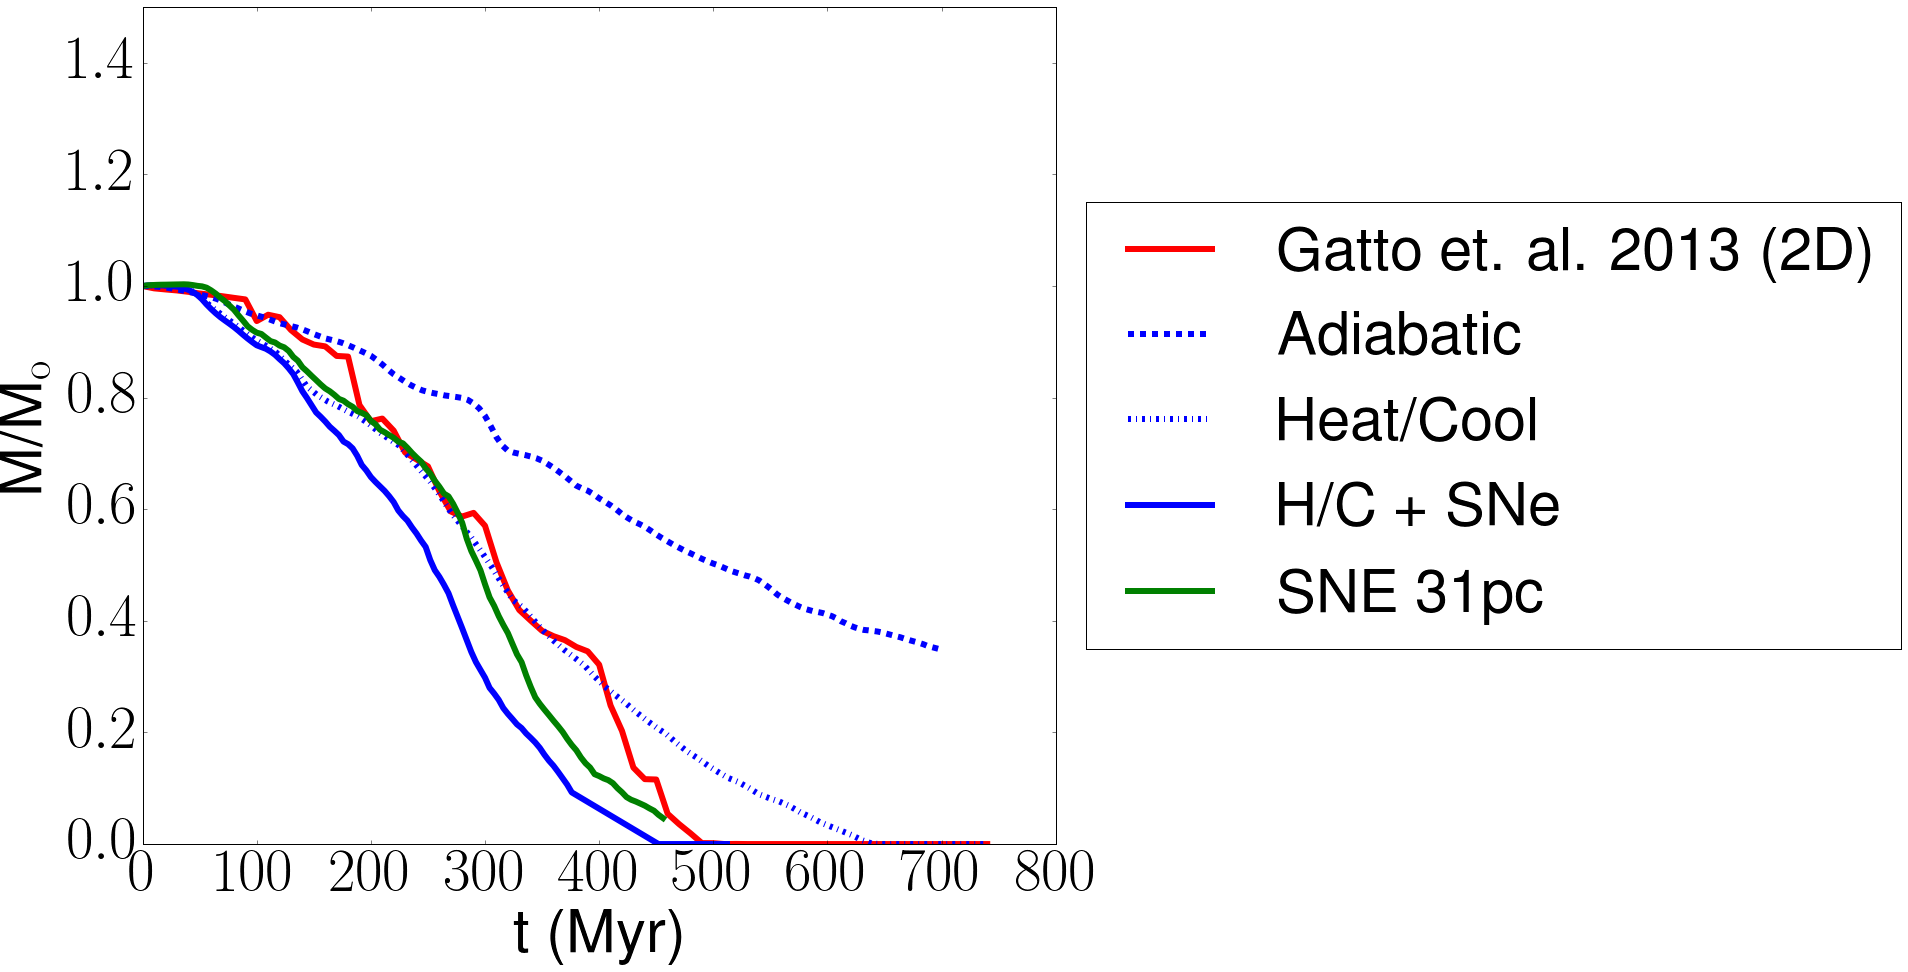

In [13]:
fig = plt.figure(figsize=[36,15])
ax1 = fig.add_subplot(1,2,1)

fs = 60; lw = 6
for i in np.arange(np.size(labels)):
    ax1.plot(time_array[i], mass_array[i]/mass_array[i][0], label=labels[i], ls=ls[i],color=colors[i],lw=lw)

ax1.plot(sne31_time, sne31_mass/sne31_mass[0], label='SNE 31pc', ls='-', color='green', lw=lw)
    
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=fs)
ax1.set_xlabel(r't (Myr)',fontsize=fs)
ax1.set_ylabel(r'M/M$_{\rm{o}}$',fontsize=fs)
ax1.set_ylim(0,1.5)
ax1.tick_params(axis='x', labelsize=fs)
ax1.tick_params(axis='y', labelsize=fs)

fig.savefig('carina_simulations_mass_evolution.png')

NameError: name 'R_RPS' is not defined

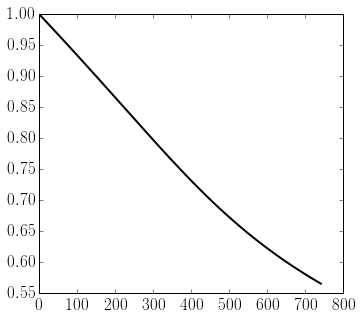

In [8]:
fig = plt.figure(figsize=[12,5])
ax1 = fig.add_subplot(1,2,1)

ax1.plot(t /cgs.Myr,R_tot/R_tot[0],label='RPS-KH Shock', lw=2, ls='-', color='black')
ax1.plot(t /cgs.Myr,R_RPS/R_RPS[0],label='RPS - Shock', lw=2,ls='--',color='black')
ax1.plot(t /cgs.Myr,R_KH /R_KH[0] ,label='KH',  lw=2,ls='-.',color='black')
ax1.plot(t /cgs.Myr,R_tot2/R_tot2[0], label='RPS-KH - Sound', lw=2,ls='-',color='green')
ax1.plot(t /cgs.Myr,R_RPS_sound/R_RPS_sound[0],label='RPS - Sound', lw=2,ls='--',color='green')

for i in np.arange(np.size(labels)):
    plt.plot(time_array[i], mass_array[i]/mass_array[i][0], label=labels[i], ls=ls[i],color=colors[i],lw=2)

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_xlabel(r't (Myr)')
ax1.set_ylabel(r'R/R$_{o}$')
ax1.set_ylim(0,1)
fig.savefig('carina_radius_evolution.png')

In [ ]:
plt.plot(t/cgs.Myr,anal_carina.galaxy_velocity(t)/1.0E5)
plt.ylabel(r'Velocity (km/s)')
plt.xlabel(r'Time (Myr)')
plt.savefig('carina_orbit.png')

In [ ]:
np.where(

In [ ]:
t = np.linspace(0.0,np.max(t_orbit)/cgs.Myr,100.0)*cgs.Myr
M_fit, R_fit = anal_carina.evolve(t, ['RPS','KH'],
                                   physics_kwargs={'RPS':{'alpha':0.5,'beta':50.0, 'method':'sound',
                                                                          'T_galaxy':1.0E4,
                                                                          'mu_galaxy':carina.ic['mu_dwarf']}})



In [ ]:
#
# Lets try and do some fitting....
#
mdot_adiabatic = np.diff(adiabatic['m'])/np.diff(adiabatic['t'])
mdot_fit       = np.diff(M_fit/cgs.Msun)/np.diff(t/cgs.Myr)



In [ ]:
tad = adiabatic['t'][0:-1]


plt.plot(adiabatic['t'][0:-1], mdot_adiabatic, lw=2, label='Adiabatic',color='blue')
plt.plot(t[0:-1]/cgs.Myr, mdot_fit, lw=2, label='Analytical',color='green')
dn=25
mad_avg =[]
for nmin in np.arange(0,np.size(tad),dn):
    nmax = nmin+dn
    if nmax > np.size(tad):
        nmax = np.size(tad)
    plt.plot(tad[nmin:nmax], np.ones(np.size(tad[nmin:nmax]))*np.average(mdot_adiabatic[nmin:nmax]),lw=2,color='black',)
    mad_avg.append(np.average(mdot_adiabatic[nmin:nmax]))
mad_avg=np.array(mad_avg)

print mad_avg
print np.average(mad_avg), np.average(mdot_fit[0:500])
plt.legend(loc='best')
plt.ylabel(r'Mass Loss Rate (M$_{\odot}$ Myr$^{-1}$)')
plt.xlabel(r't (Myr)')

In [ ]:
print adiabatic['t']